# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

---

## Zestaw zadań 2: Badanie intensywności procesów punktowych (część 1)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import math
sns.set() 
sns.set_theme(style="whitegrid")

In [3]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    x_del=x_lim[1]-x_lim[0]
    y_del=y_lim[1]-y_lim[0]
    exp_val = intensity * (x_del)*(y_del)
    points_num=sp.stats.poisson(exp_val).rvs()
    xx = x_del*sp.stats.uniform.rvs(0,1,((points_num,1)))+x_lim[0]#x coordinates of Poisson points
    yy = y_del*sp.stats.uniform.rvs(0,1,((points_num,1)))+y_lim[0]#y coordinates of Poisson points
    return pd.DataFrame({"X":xx.ravel(),"Y":yy.ravel()})
def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):
    """
    Parameters
    -------
    intensity_function: function
        Funkcja przyjmująca dwa argumenty (macierz 1D współrzędnych X i macierz 1D współrzędnych Y) i zwracająca macierz 1D
        z wartościami funkcji opisującej intensywność procesu dla tych współrzędnych.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    def flipped_func(xy):
        return -intensity_function(xy[0],xy[1])
    x=np.linspace(x_lim[0],x_lim[1],100)
    y=np.linspace(y_lim[0],y_lim[1],100)
    
    bounds = [x_lim , y_lim ]
    x0 = ((x_lim[1]-x_lim[0])/2,(y_lim[1]-y_lim[0])/2)
    
    intense= sp.optimize.minimize(flipped_func,x0,bounds=bounds)
    intense=-intense.fun
    poisson=homogeneous_poisson_on_rectangle(intense, x_lim, y_lim)
    X=[]
    Y=[]
    intensity=[]
    for index,row in poisson.iterrows():
        lim=intensity_function(row["X"], row["Y"])/intense
        if np.random.random() <= lim:
            intensity.append(intensity_function(row["X"], row["Y"]))
            X.append(row["X"])
            Y.append(row["Y"])
    df_res={'X':X,'Y':Y,'I':intensity}
    return pd.DataFrame(df_res)
def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    x_lim_temp[0] = x_lim[0] - cluster_radius
    x_lim_temp[1] = x_lim[1] + cluster_radius
    y_lim_temp[0] = y_lim[0] - cluster_radius
    y_lim_temp[1] = y_lim[1] + cluster_radius
    df1=homogeneous_poisson_on_rectangle(parent_intensity, x_lim, y_lim)
    df2=[]
    for index,row in df1.iterrows():
        x_temp=[row['X']-cluster_radius,row['X']+cluster_radius]
        y_temp=[row['Y']-cluster_radius,row['Y']+cluster_radius]
        df_temp=homogeneous_poisson_on_rectangle(daughter_intensity, x_temp, y_temp)
        df_temp=df_temp[((df_temp['X']-row['X'])**2+(df_temp['Y']-row['Y'])**2)**(1/2)<=cluster_radius]
        df_temp = df_temp[df_temp['X'] >= ( x_lim_temp[0] + cluster_radius )]
        df_temp = df_temp[df_temp['X'] <= ( x_lim_temp[1] - cluster_radius )]     
        df_temp = df_temp[df_temp['Y'] >= ( y_lim_temp[0] + cluster_radius )] 
        df_temp = df_temp[df_temp['Y'] <= ( y_lim_temp[1] - cluster_radius )] 
        df2.append(df_temp)
    return pd.concat(df2, ignore_index=True)
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    cluster_radius=cluster_sigma*4
    x_lim_temp[0] = x_lim[0] - cluster_radius
    x_lim_temp[1] = x_lim[1] + cluster_radius
    y_lim_temp[0] = y_lim[0] - cluster_radius
    y_lim_temp[1] = y_lim[1] + cluster_radius
    df1=homogeneous_poisson_on_rectangle(parent_intensity, x_lim, y_lim)
    df2=[]
    for index,row in df1.iterrows():
        points_num=sp.stats.poisson(mean_cluster_size).rvs()
        x = np.random.normal(row['X'], cluster_sigma, points_num)
        y = np.random.normal(row['Y'], cluster_sigma, points_num)
        df_temp = pd.DataFrame({"X":x,"Y":y})
        df_temp=df_temp[df_temp['X']>=(x_lim_temp[0]+cluster_radius)]
        df_temp=df_temp[df_temp['X']<=(x_lim_temp[1]-cluster_radius)]    
        df_temp=df_temp[df_temp['Y']>=(y_lim_temp[0]+cluster_radius)] 
        df_temp=df_temp[df_temp['Y']<=(y_lim_temp[1]-cluster_radius)] 
        df2.append(df_temp)
    return pd.concat(df2, ignore_index=True)

### Przygotowanie danych (5 pkt)

Korzystając z funkcji przygotowanych w ramach pierwszego zestawu zadań wygeneruj rozkłady punktowe o podanych paramatrach.

Jednorodny rozkłada Poissona:
 - intensywność procesu: 20
 
Niejednorodny rozkład Poissona:
 - intensywność procesu: f(x, y) = $10(cos(\frac{\pi}{4} x)+1)$

Rozkład Materna:
 - intensywność procesu macierzystego: 0.15
 - intensywność procesu potomnego: 15
 - promień klastra: 1.25
 
Rozkład Thomasa:
 - intensywność procesu macierzystego: 0.3
 - średnia liczebność klastra: 20
 - odchylenie standardowe klastra: 0.75

Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [-10, 10]
 - zakres wartości współrzędnej y: [-5, 5]

In [4]:
# YOUR CODE HERE
xs = [-10,10]
ys = [-5,5]

homopoisson=homogeneous_poisson_on_rectangle(20,xs,ys)
unhomopoisson=unhomogeneous_poisson_on_rectangle( lambda x,y: 10*(math.cos(math.pi*x/4)+1) , xs, ys)
materna=materna_on_rectangle(0.15, 15, 1.25, xs, ys)
thomas=thomas_on_rectangle(0.3, 20, 0.75, xs, ys)

### Zadanie 1: Badanie intensywności procesu punktowego metodą szacowania lokalnego (20 pkt)

Przygotuj funkcję `point_count_on_subregions()`, która będzie zliczać punkty w obrębie prostokątnych podobszarów oraz funkcję `intensity_on_subregions()`, która będzie obliczać intensywność procesu punktowego w obrębie prostokątnych podobszarów.

Następnie wykorzystaj przygotowane funkcje do zbadania intensywności wszystkich przygotowanych rozkładów punktów. Ustaw podział obszaru na 40 podobszarów wzdłuż osi $x$ i 20 podobszarów wzdłuż osi $y$.

Przedstaw wyniki analizy graficznie w postaci histogramów dwuwymiarowych z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2).

#### a) Przygotowanie funkcji

In [5]:
def point_count_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    bin_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z liczbą punków przypisanych do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[7, 2], [4, 5]])]
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    gridx = np.linspace(x_lim[0], x_lim[1], bins[0])
    gridy = np.linspace(y_lim[0], y_lim[1], bins[1])
    grid, _, _ = np.histogram2d(points["X"], points["Y"], bins=[gridx, gridy])
    bin_data = [gridx, gridy, grid]
    return bin_data

def intensity_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z wartością intensywności przypisaną do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[9, 12], [13, 8]])]
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    [gridx, gridy, grid] = point_count_on_subregions(points, bins, x_lim, y_lim)
    dx=gridx[1]-gridx[0]
    dy=gridy[1]-gridy[0]
    p=dx*dy
    intensity=grid/p
    intensity_data=[gridx, gridy, intensity]
    return intensity_data

#### b) Wygenerowanie danych

In [7]:
# YOUR CODE HERE
#raise NotImplementedError()
gridlist = [40, 20]
intenstity_homopoisson = intensity_on_subregions(homopoisson, gridlist, xs, ys)
intenstity_unhomopoisson = intensity_on_subregions(unhomopoisson, gridlist, xs, ys)
intenstity_materna = intensity_on_subregions(materna, gridlist, xs, ys)
intenstity_thomas = intensity_on_subregions(thomas, gridlist, xs, ys)

#### c) Wizualizacja

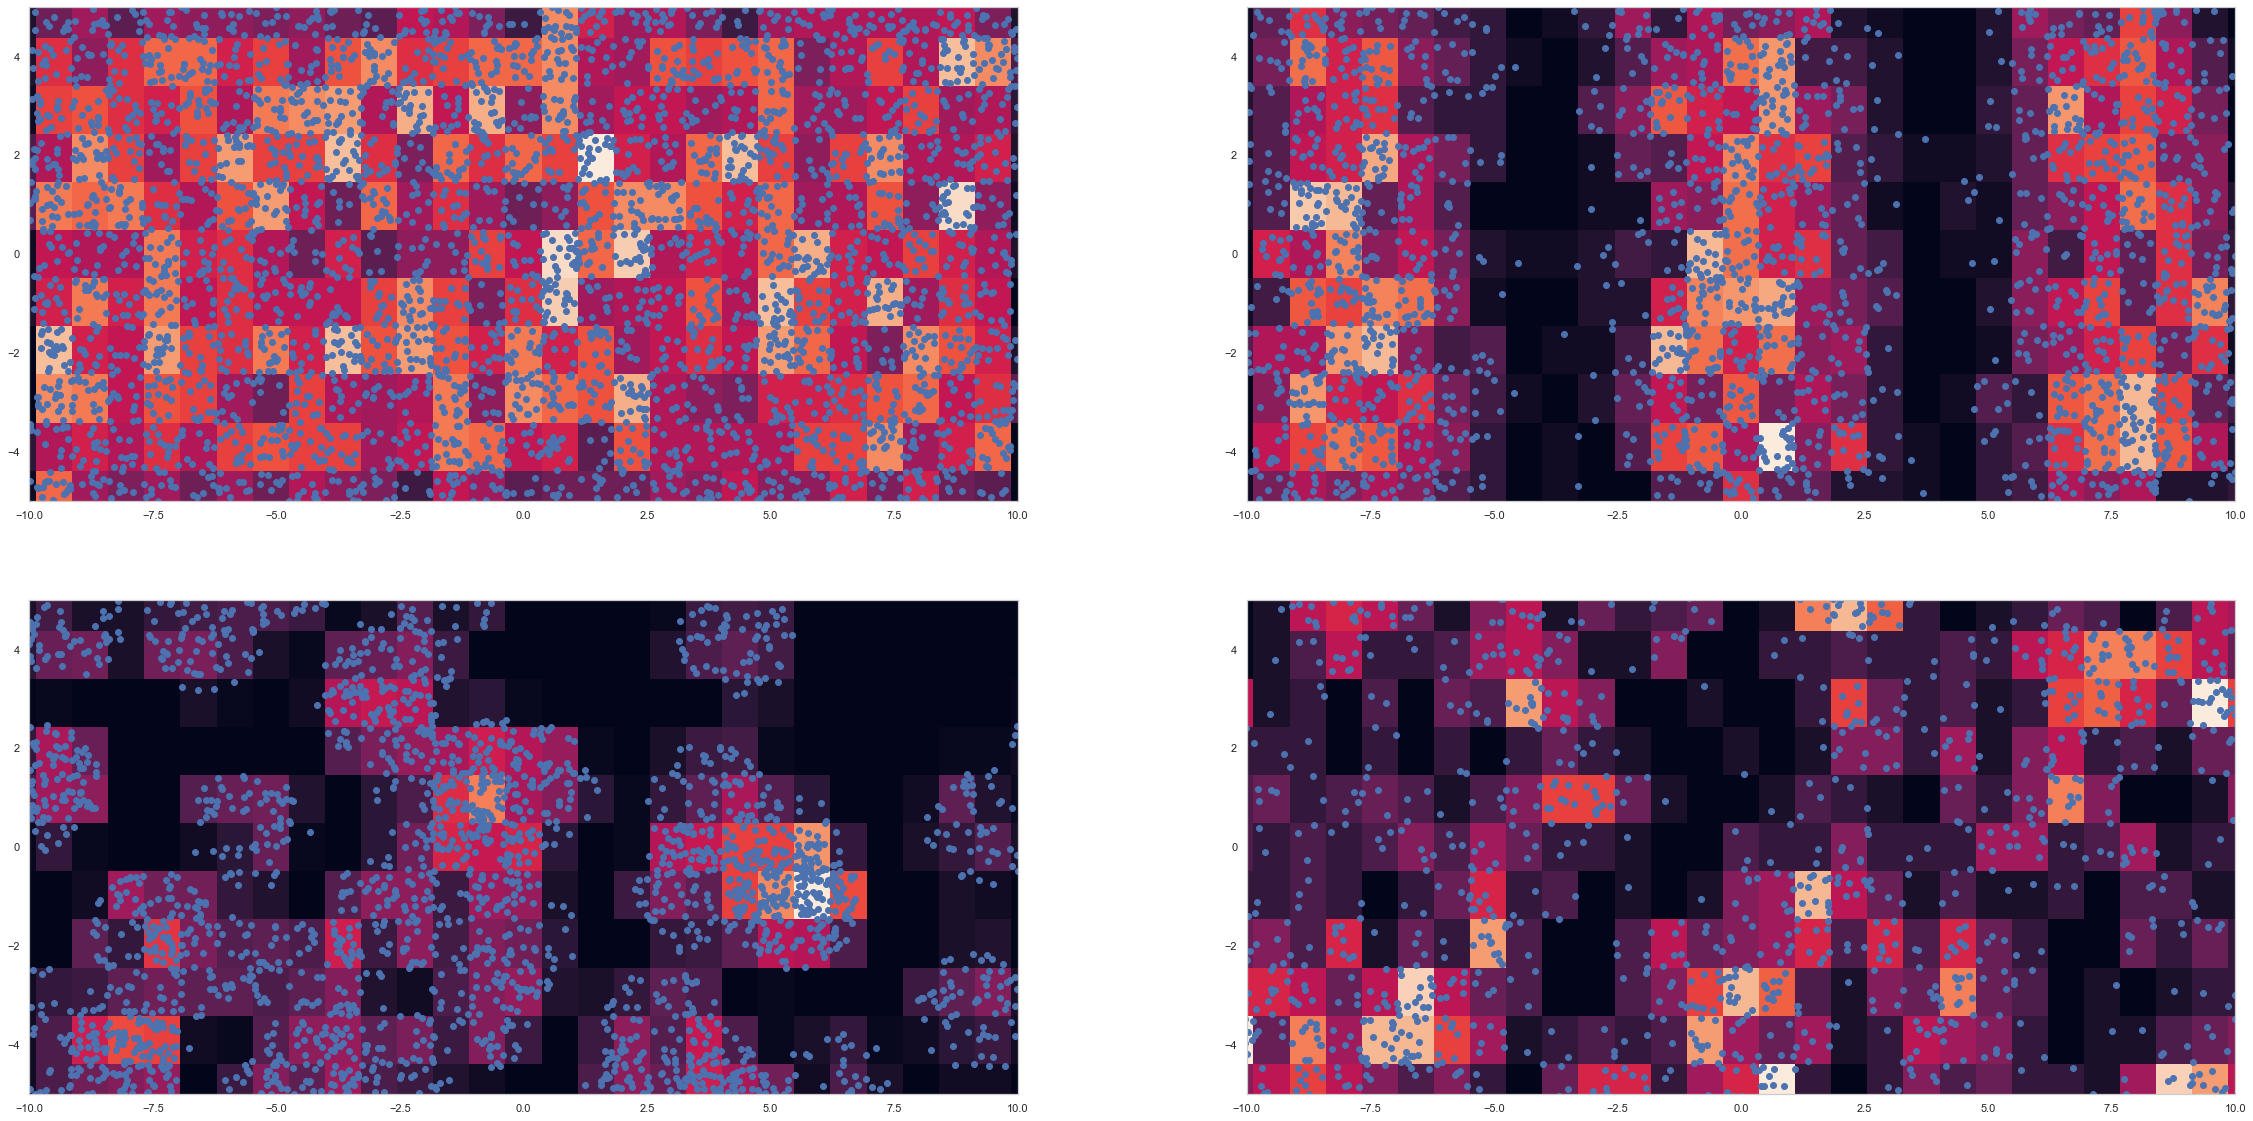

In [8]:
# YOUR CODE HERE
#raise NotImplementedError()
fig, axs=plt.subplots(2,2, figsize=[40,20])
axs[0][0].axis('square')
axs[0][0].set_xlim([-10,10])
axs[0][0].set_ylim([-5,5])
axs[0][0].pcolormesh(intenstity_homopoisson[0], intenstity_homopoisson[1], np.transpose(intenstity_homopoisson[2]))
axs[0][0].scatter(homopoisson['X'], homopoisson['Y'])

axs[0][1].axis('square')
axs[0][1].set_xlim([-10,10])
axs[0][1].set_ylim([-5,5])
axs[0][1].pcolormesh(intenstity_unhomopoisson[0], intenstity_unhomopoisson[1], np.transpose(intenstity_unhomopoisson[2]))
axs[0][1].scatter(unhomopoisson['X'], unhomopoisson['Y'])

axs[1][0].axis('square')
axs[1][0].set_xlim([-10,10])
axs[1][0].set_ylim([-5,5])
axs[1][0].pcolormesh(intenstity_materna[0], intenstity_materna[1], np.transpose(intenstity_materna[2]))
axs[1][0].scatter(materna['X'], materna['Y'])

axs[1][1].axis('square')
axs[1][1].set_xlim([-10,10])
axs[1][1].set_ylim([-5,5])
axs[1][1].pcolormesh(intenstity_thomas[0], intenstity_thomas[1], np.transpose(intenstity_thomas[2]))
axs[1][1].scatter(thomas['X'], thomas['Y'])

### Zadanie 2: Badanie intensywności procesu punktowego metodą funkcji jądrowych (25 pkt)

Przygotuj funkcję `intensity_on_kde()`, która będzie obliczać intensywność procesu punktowego z wykorzystaniem jądrowego estymatora funkcji intensywności danego wzorem:
$$ 	\grave{\lambda}(x,y) = \sum_{d_i < \tau} \frac{3}{\pi \tau^2} (1-\frac{d_i^2}{\tau^2})^2$$ 

gdzie: $d_i$ - odległość punktu od centrum funkcji jądrowej, $\tau$ - promień funkcji jądrowej.

Następnie wykorzystaj przygotowaną funkcje do zbadania intensywności wszystkich przygotowanych rozkładów punktów. Wykonaj obliczania dla promienia funkcji jądrowej równego 1.5 i siatki  200x100 regularnie rozłożonych i pokrywających cały obszar punktów.

Przedstaw wyniki analizy graficznie w postaci wykresów konturowych z wypełnieniem z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2).

Uwaga! Funkcja przygotowana według powyższych wytycznych nie ma wbudowanego mechanizmu korekty na efekt brzegowy, w związu z czym będzie zaniżać wartość intensywności przy krawędziach analizowanego obszaru.

#### a) Przygotowanie funkcji

In [6]:
def intensity_on_kde(points, kernel_radius, grid, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    grid: list
        Lista określająca liczbę punktów w poziomie i pionie, dla których wyliczane będą wartości intensywności.
        Przykład: [10, 10]
    kernel_radius: float
        Liczba dodatnia określająca promień funkcji jądrowej.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: DataFrame
        Tablica zawierająca trzy kolumny - dwie ze współrzędnymi opisane jako "X" i "Y"
        oraz kolumnę z wartościami intensywności wyliczonymi dla tych współrzędnych opisaną jako "I".
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    x = np.linspace(x_lim[0],x_lim[1],grid[0])
    y = np.linspace(y_lim[0],y_lim[1],grid[1])
    X, Y = np.meshgrid(x, y)
    X=X.flatten()
    Y=Y.flatten()
    coords = list(zip(X, Y))
    result=[];
    for X,Y in coords:
        df_temp=points[((points['X']-X)**2+(points['Y']-Y)**2)**(1/2)<=kernel_radius]
        temp=[]
        for index,row in df_temp.iterrows():
            temp.append(3/(np.pi*kernel_radius**2)*(1-((row['X']-X)**2+((row['Y']-Y)**2))/kernel_radius**2)**2)
        result.append(sum(temp))
    x = np.linspace(x_lim[0],x_lim[1],grid[0])
    y = np.linspace(y_lim[0],y_lim[1],grid[1])
    X, Y = np.meshgrid(x, y)
    X=X.flatten()
    Y=Y.flatten()
    d={'X':X,
       'Y':Y,
       'I':result}
    return pd.DataFrame(data=d)

#### b) Wygenerowanie danych

In [ ]:
gr = [200, 100]
radius = 1.5
kde_homopoisson = intensity_on_kde(homopoisson, radius, gr, xs, ys)
kde_unhomopoisson = intensity_on_kde(unhomopoisson, radius, gr, xs, ys)
kde_materna = intensity_on_kde(materna, radius, gr, xs, ys)
kde_thomas = intensity_on_kde(thomas, radius, gr, xs, ys)

#### c) Wizualizacja

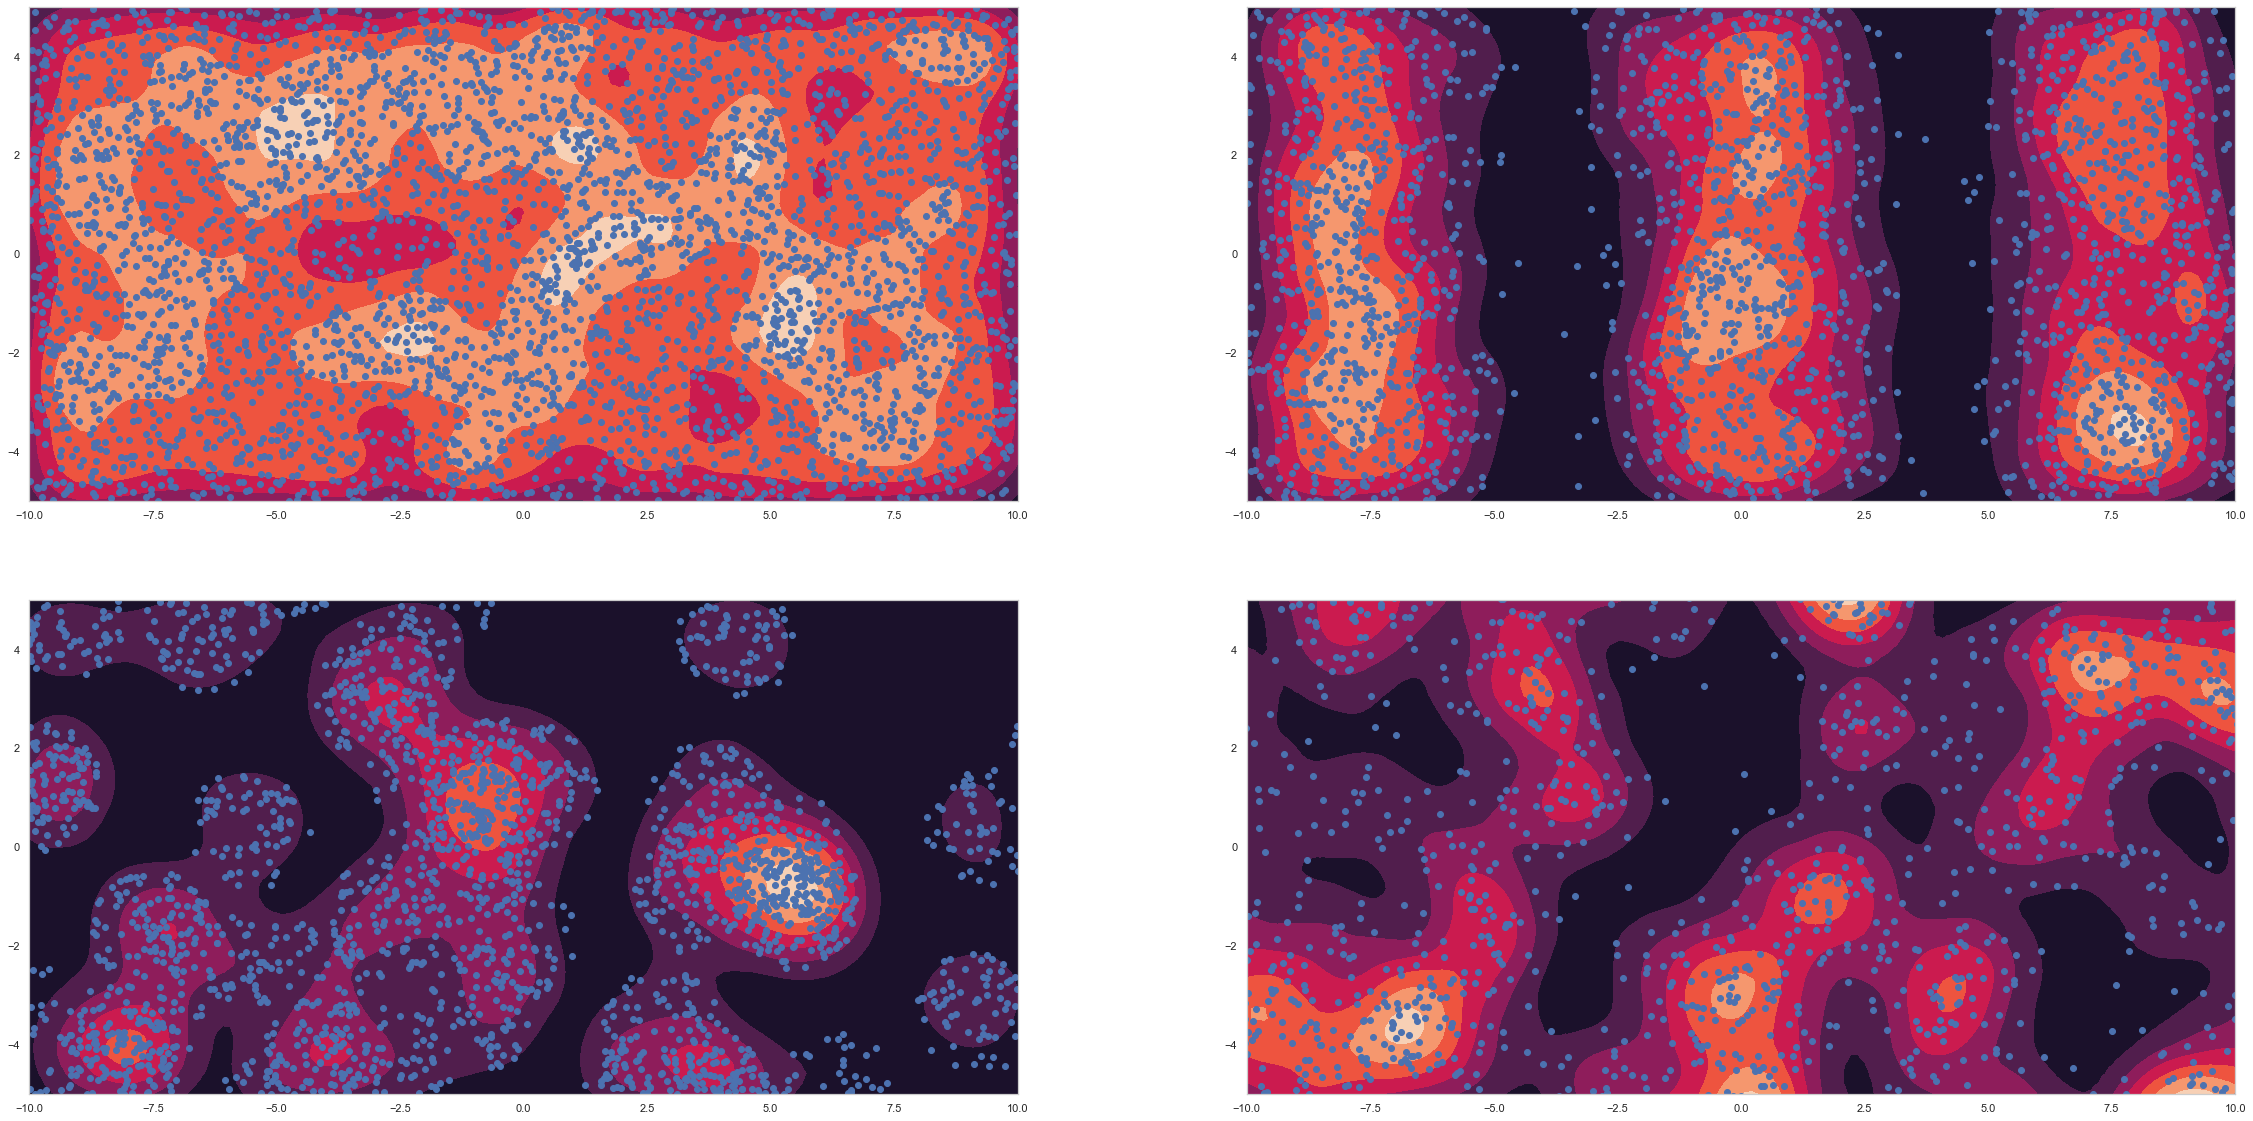

In [12]:
# YOUR CODE HERE
fig, axs=plt.subplots(2,2, figsize=[40,20])
plt.axes(axs[0][0])

axs[0][0].axis('square')
axs[0][0].set_xlim([-10,10])
axs[0][0].set_ylim([-5,5])
plt.tricontourf(kde_homopoisson['X'], kde_homopoisson['Y'], kde_homopoisson['I'])
axs[0][0].scatter(homopoisson['X'], homopoisson['Y'])

plt.axes(axs[0][1])
axs[0][1].axis('square')
axs[0][1].set_xlim([-10,10])
axs[0][1].set_ylim([-5,5])
plt.tricontourf(kde_unhomopoisson['X'], kde_unhomopoisson['Y'], kde_unhomopoisson['I'])
axs[0][1].scatter(unhomopoisson['X'], unhomopoisson['Y'])

plt.axes(axs[1][0])
axs[1][0].axis('square')
axs[1][0].set_xlim([-10,10])
axs[1][0].set_ylim([-5,5])
plt.tricontourf(kde_materna['X'], kde_materna['Y'], kde_materna['I'])
axs[1][0].scatter(materna['X'], materna['Y'])

plt.axes(axs[1][1])
axs[1][1].axis('square')
axs[1][1].set_xlim([-10,10])
axs[1][1].set_ylim([-5,5])
plt.tricontourf(kde_thomas['X'], kde_thomas['Y'], kde_thomas['I'])
axs[1][1].scatter(thomas['X'], thomas['Y'])